# Fantasy Football

ESPN Fantasy Football from the league I've played in 2023.

Data extracted using [espnfantasyfootball](https://github.com/tbryan2/espnfantasyfootball).

## Initiate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/players.csv")
mt = pd.read_csv("data/matches.csv")

## Some Variables to work with

In [2]:
my_team = "Steely Dan Fan Club"
last_full_week = 17

## Prepare

1. Rename columns
2. Filter only played weeks

In [3]:
# 1
df.rename(columns={
    "Week": "week",
    "PlayerName": "name",
    "PlayerScoreActual": "score",
    "PlayerScoreProjected": "projected",
    "PlayerFantasyTeam": "team_index",
    "PlayerRosterSlot": "position",
    "TeamName": "team",
    "FullName": "user"
}, inplace=True)
mt.rename(columns={
    "Week": "week",
    "Name1": "team1",
    "Score1": "score1",
    "Name2": "team2",
    "Score2": "score2",
    "Type": "type"
}, inplace=True)

#2
df = df[df.week<=last_full_week]
mt = mt[mt.week<=last_full_week].drop_duplicates()

## Working Data

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   week        3828 non-null   int64  
 1   name        3828 non-null   object 
 2   score       3828 non-null   float64
 3   projected   3828 non-null   float64
 4   team_index  3828 non-null   int64  
 5   position    3828 non-null   object 
 6   team        3828 non-null   object 
 7   user        3828 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 239.4+ KB


,week,name,score,projected,team_index,position,team,user
0,1,Davante Adams,15.60,21.204351,1,WR,Joe Burrow's Side Piece,Briony Quirk
1,1,Patrick Mahomes,18.54,24.679680,1,QB,Joe Burrow's Side Piece,Briony Quirk
2,1,Aaron Jones,28.70,16.338186,1,RB,Joe Burrow's Side Piece,Briony Quirk
3,1,T.J. Hockenson,12.00,13.890898,1,TE,Joe Burrow's Side Piece,Briony Quirk
4,1,Brandon Aiyuk,37.90,11.752372,1,WR,Joe Burrow's Side Piece,Briony Quirk


In [5]:
mt.info() # the 2 null team1 were a Bye week in the playoffs
mt.head()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   week    120 non-null    int64  
 1   team1   118 non-null    object 
 2   score1  118 non-null    float64
 3   team2   120 non-null    object 
 4   score2  120 non-null    float64
 5   type    120 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 6.6+ KB


,week,team1,score1,team2,score2,type
0,1,Luluists,141.64,Briony’s Blownbackers,160.76,Regular
1,1,Steely Dan Fan Club,132.24,Team Sand,61.10,Regular
2,1,Intentional Sounding,106.98,Joey's Calzones,77.76,Regular
3,1,RB Strike Supporter,89.34,Joe Burrow's Side Piece,133.44,Regular
4,1,THE FLOCK,112.28,Crimson N Cream Deng Xiaopings,120.94,Regular


# Metrics, Tables and Charts

## Teams wins and total scores

In [9]:
wins = pd.Series(np.where(mt.score1 > mt.score2, mt.team1, mt.team2)).value_counts()
scores = df[df.position!='Bench'].groupby(['team']).score.sum().sort_values(ascending=False)

pd.concat({'wins': wins, 'total_scores': scores}, axis=1).sort_values(['wins', 'total_scores'], ascending=False)

# To get the average point per match (week) per team
# df[df.position!='Bench'].groupby(['week', 'team']).score.sum().groupby('team').mean().sort_values(ascending=False)

,wins,total_scores
SlurpmystepBURROW,14,2244.36
DEVOLDER DOMINATORS,11,2099.04
Joe Burrow's Side Piece,10,2192.42
Honolulu HSTSchads,10,1994.64
Briony’s Blownbackers,10,1828.12
Team Sand,9,2136.64
RB Strike Supporter,8,2079.32
Steely Dan Fan Club,8,2026.50
Crimson N Cream Deng Xiaopings,8,2011.84
Intentional Sounding,7,2093.34


132.02117647058824

## Teams' average of points per game

In [15]:
df[df.position!='Bench'].groupby(['week', 'team']).score.sum().groupby('team').mean().sort_values(ascending=False)

team
SlurpmystepBURROW                 132.021176
Joe Burrow's Side Piece           128.965882
Team Sand                         125.684706
DEVOLDER DOMINATORS               123.472941
Intentional Sounding              123.137647
RB Strike Supporter               122.312941
Steely Dan Fan Club               119.205882
Crimson N Cream Deng Xiaopings    118.343529
Honolulu HSTSchads                117.331765
Luluists                          116.002353
Joey's Calzones                   112.324706
non-human biologics               107.783529
Briony’s Blownbackers             107.536471
THE FLOCK                         100.016471
Name: score, dtype: float64

Or, checking individually

In [28]:
team_name = "SlurpmystepBURROW"
pd.concat([mt.loc[mt['team1']==team_name, 'score1'], mt.loc[mt['team2']==team_name, 'score2']]).mean()

132.02117647058824

## Comparing players

In [29]:
def plot_players_score_throughout_season(df, ax, players, title="Players performances throughout the season"):
    """ Given the DataFrame, the axes, and the players names, plot the scores of the players throughout the weeks of the season in the axes
    """
    
    df[df.name.isin(players)][['week', 'name', 'score']]\
        .pivot(columns="name", index="week", values="score")\
        .plot(ax=ax)
    
    ax.set_title(title)
    ax.legend(title=None)
    # ax.set_ylim(bottom=0)
    # Set xticks to be only integers
    from matplotlib.ticker import MaxNLocator
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

<IPython.core.display.Javascript object>


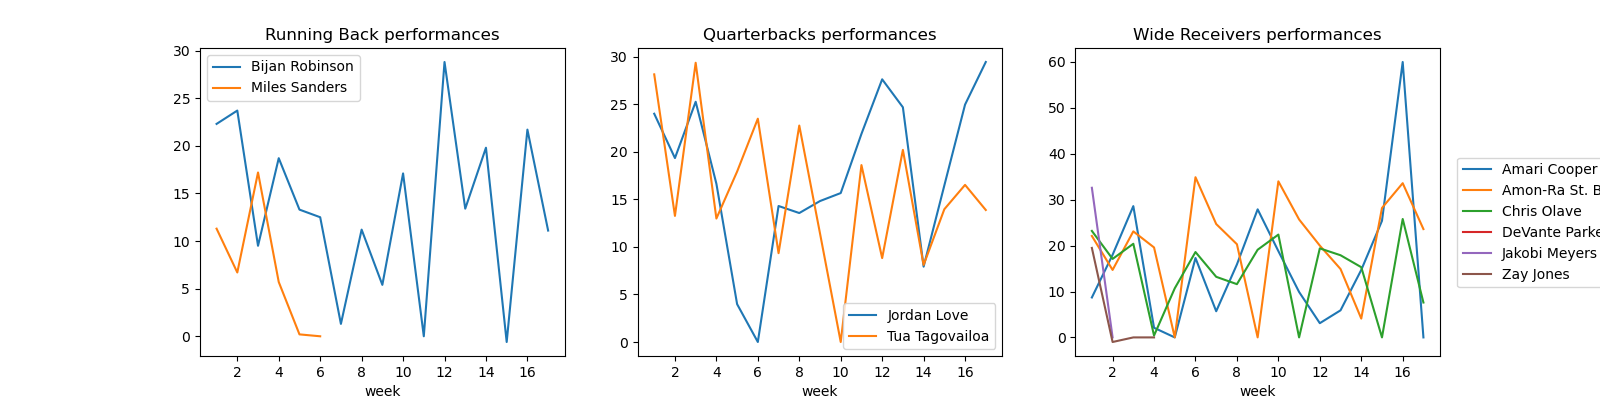

In [95]:
%matplotlib notebook
rbs = ["Bijan Robinson", "Miles Sanders"]
wrs = ["Amon-Ra St. Brown", "Chris Olave", "Amari Cooper", "Amari Cooper", "Jakobi Meyers", "DeVante Parker", "Zay Jones"]
qbs = ["Tua Tagovailoa", "Jordan Love"]

fig, ax = plt.subplots(figsize=(16,4), ncols=3)

plot_players_score_throughout_season(df[(df.team==my_team)], ax[0], rbs, title="Running Back performances")
plot_players_score_throughout_season(df[(df.team==my_team)], ax[1], qbs, title="Quarterbacks performances")
plot_players_score_throughout_season(df[(df.team==my_team)], ax[2], wrs, title="Wide Receivers performances")

ax[2].legend(loc='lower center', bbox_to_anchor=(1.3, 0.2))

In [102]:
%matplotlib inline

## Comparing projections with actual scores

[Text(0.5, 1.0, 'Histogram of projection error (projected - actual score)'),
 Text(0.5, 0, 'Error')]

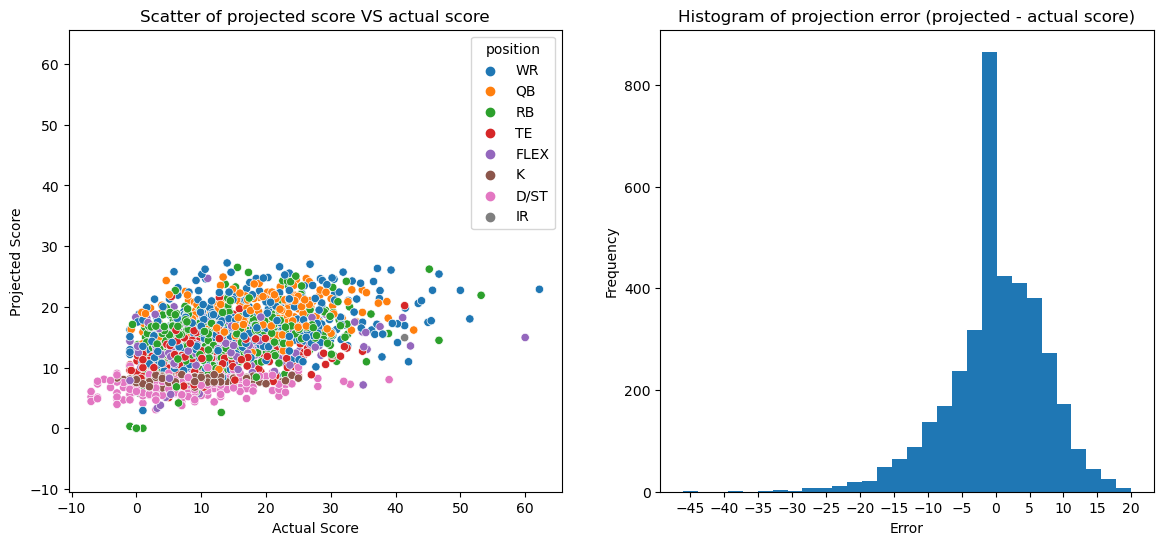

In [94]:
import matplotlib.ticker as ticker

fig, axs = plt.subplots(figsize=(14, 6), ncols=2)

df['projection_error'] = df.projected - df.score

sns.scatterplot(data=df[df.position!='Bench'], x='score', y='projected', hue='position', ax=axs[0])
axs[0].set(title="Scatter of projected score VS actual score", xlabel="Actual Score", ylabel="Projected Score")
# Y axis limits to the same as X axis limits
axs[0].set_ylim(bottom=axs[0].get_xlim()[0], top=axs[0].get_xlim()[1])

df['projection_error'].plot.hist(bins=30, ax=axs[1])
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
axs[1].set(title="Histogram of projection error (projected - actual score)", xlabel="Error")

## Comparing a positions scores across teams in a week

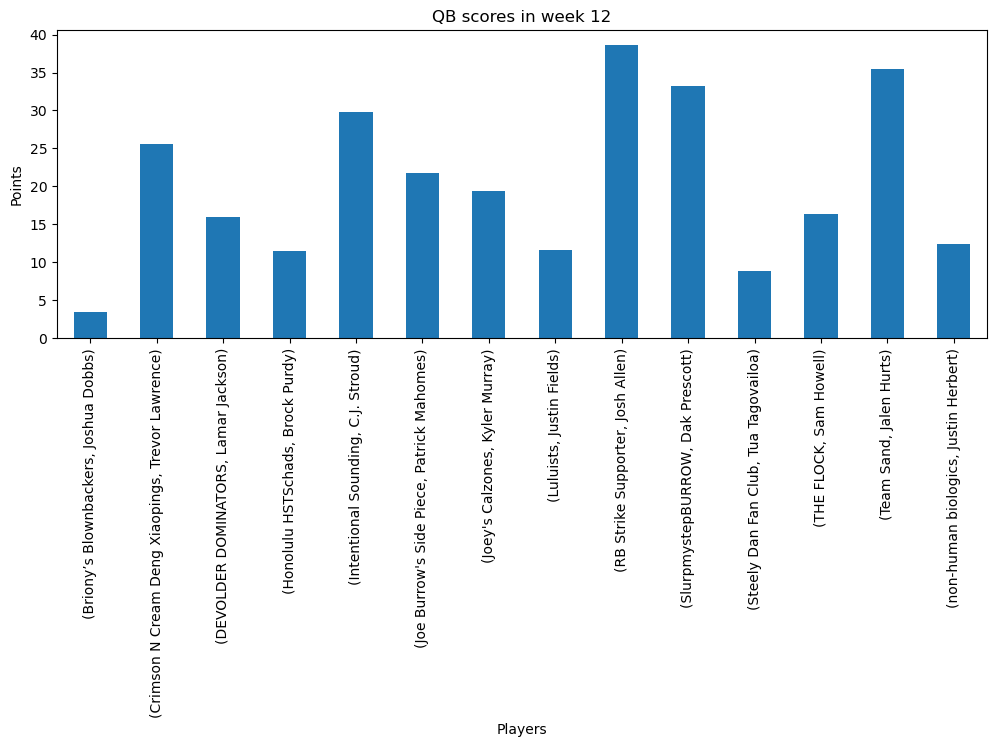

In [103]:
week = 12
position = 'QB'

rb_score_week = df[(df.week==week) & (df.position==position)][["team", "name", "score"]]\
    .sort_values(by="team")\
    .set_index(["team", "name"])

fig, ax = plt.subplots(figsize=(12, 4))
rb_score_week.plot.bar(ax=ax, legend=False)

ax.set_title(f"{position} scores in week {week}")
#ax.set_xticks(ax.get_xticks(), labels=rb_score_week.index.get_level_values(1))
ax.set_xlabel("Players")

ax.set_ylabel("Points")

plt.show()